<a name="top"></a>

# Basic usage of the human locomotion data set from `loadmydata`

*Last update: April 27, 2021.*

This data set consists of 1,020 multivariate gait signals collected with two inertial measurement units, from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In total, there are 8.5 h of gait time series (sampled at 100 Hz). The measured population was composed of healthy subjects as well as patients with neurological or orthopedic disorders. The start and end time stamps of more than 40,000 footsteps are available, as well as a number of contextual information about each trial. This exact data set was used in [1] to design and evaluate a step detection procedure.

The data are thoroughly described in [2].

> [1] Oudre, L., Barrois-Müller, R., Moreau, T., Truong, C., Vienne-Jumeau, A., Ricard, D., Vayatis, N., & Vidal, P.-P. (2018). Template-based step detection with inertial measurement units. Sensors, 18(11).

> [2] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

## Setup

We import some functions from the `loadmydata` package:

In [1]:
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list
)

We also import some other libraries that will be useful for our analysis:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)
import seaborn as sns
sns.set_theme()

## Loading the data

First, we store all the 1,020 codes, each referencing a multivariate gait signal, in `code_list`:

In [3]:
code_list = get_code_list()

print(f'The type of code_list is:\n    {type(code_list)}')
print(f'\nThe length of code_list is:\n    {len(code_list)}')
print(f'\nThe type of the values of code_list is:\n    {type(code_list[0])}')
print(f'\nThe first 10 values of code_list are:\n    {code_list[0:10]}')

The type of code_list is:
    <class 'list'>

The length of code_list is:
    1020

The type of the values of code_list is:
    <class 'str'>

The first 10 values of code_list are:
    ['1-1', '1-2', '1-3', '1-4', '1-5', '2-1', '2-2', '2-3', '3-1', '3-2']


If we wish to focus only on one multivariate gait signal, we select our chosen `code` through its index, for example:

In [4]:
code = code_list[9]

print(f'The code of our chosen multivariate gait signal is:\n    "{code}"')

The code of our chosen multivariate gait signal is:
    "3-2"


Once, we have the `code`, we can load the corresponding multivariate gait signal and store it in `data`:

In [5]:
data = load_human_locomotion_dataset(code)

*Note*: It will download the data only once for all (even if you restart the kernel of this notebook).

## Understanding the format of a multivariate gait signal

The attributes of `data` are:

In [6]:
print(data.keys())

dict_keys(['signal', 'left_steps', 'right_steps', 'metadata', 'description'])


First of all, let us look into `data.signal` which enables us to extract the multivariate gait signal as a Pandas DataFrame:

In [7]:
signal = data.signal

print('Some information about signal:')
display(signal.info())

print('\nThe first 5 rows of signal are:')
display(signal.head())

Some information about signal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LAV     2075 non-null   float64
 1   LAX     2075 non-null   float64
 2   LAY     2075 non-null   float64
 3   LAZ     2075 non-null   float64
 4   LRV     2075 non-null   float64
 5   LRX     2075 non-null   float64
 6   LRY     2075 non-null   float64
 7   LRZ     2075 non-null   float64
 8   RAV     2075 non-null   float64
 9   RAX     2075 non-null   float64
 10  RAY     2075 non-null   float64
 11  RAZ     2075 non-null   float64
 12  RRV     2075 non-null   float64
 13  RRX     2075 non-null   float64
 14  RRY     2075 non-null   float64
 15  RRZ     2075 non-null   float64
dtypes: float64(16)
memory usage: 259.5 KB


None


The first 5 rows of signal are:


,LAV,LAX,LAY,LAZ,LRV,LRX,LRY,LRZ,RAV,RAX,RAY,RAZ,RRV,RRX,RRY,RRZ
0,-0.001044,-0.007348,-0.005025,0.003626,-1.179313,-1.748553,-3.923271,0.393393,0.003202,-0.019837,0.016119,0.017407,-0.518325,1.136519,-2.786695,-1.748553
1,-0.000053,-0.003609,-0.010943,0.003958,-0.756476,-1.606459,-3.781178,0.775899,0.002248,-0.018132,0.024442,0.017215,-0.063367,0.491770,-2.426075,-0.830560
2,0.002816,0.002645,-0.018659,0.005457,-0.649569,-0.874276,-4.316664,0.611976,-0.001815,-0.024816,0.013460,0.013637,0.149127,-0.262300,-3.092712,-0.349733
3,0.009301,0.005146,-0.014473,0.010732,-0.261601,-0.524543,-3.431502,0.688466,0.003422,-0.016170,-0.001533,0.012084,0.610045,-0.480826,-3.824894,0.131150
4,0.003331,0.005016,-0.001138,0.001147,-0.125924,0.174867,-2.874128,0.349733,0.002091,-0.006150,-0.010243,0.003663,0.251478,-0.743126,-3.136428,0.000000


<mark>Explain what are the features</mark>

Now, let us look into `data.left_steps`:

In [8]:
left_steps = data.left_steps

print(f'The type of left_steps is:\n    {type(left_steps)}')
print(f'\nThe shape of left_steps is (n_left_steps, 2) and here it is:\n    {np.shape(left_steps)}')
print(f'\nPrinting left_steps:')
print(left_steps)

The type of left_steps is:
    <class 'numpy.ndarray'>

The shape of left_steps is (n_left_steps, 2) and here it is:
    (13, 2)

Printing left_steps:
[[ 573  651]
 [ 686  754]
 [ 788  859]
 [ 889  953]
 [ 989 1054]
 [1091 1154]
 [1203 1274]
 [1323 1388]
 [1424 1494]
 [1529 1591]
 [1627 1691]
 [1728 1793]
 [1830 1898]]


For `data.right_steps`, the philosophy is the same as `data.left_steps`:

In [9]:
right_steps = data.right_steps

print(f'The type of right_steps is:\n    {type(right_steps)}')
print(f'\nThe shape of right_steps is (n_right_steps, 2) and here it is:\n    {np.shape(right_steps)}')
print(f'\nPrinting right_steps:')
print(right_steps)

The type of right_steps is:
    <class 'numpy.ndarray'>

The shape of right_steps is (n_right_steps, 2) and here it is:
    (14, 2)

Printing right_steps:
[[ 519  598]
 [ 631  701]
 [ 735  800]
 [ 836  903]
 [ 940 1002]
 [1037 1101]
 [1144 1199]
 [1267 1334]
 [1375 1438]
 [1477 1540]
 [1578 1640]
 [1679 1741]
 [1777 1842]
 [1886 1945]]


Now, let us look into `data.metadata` which is a dictionary:

In [10]:
metadata = data.metadata

print(f'The type of metadata is:\n    {type(metadata)}')
print(f'\nThe length of metadata is:\n    {len(metadata)}')
print(f'\nDisplaying metadata:')
display(metadata)

The type of metadata is:
    <class 'dict'>

The length of metadata is:
    14

Displaying metadata:


{'Subject': 3,
 'Trial': 2,
 'Code': '3-2',
 'Age': 18,
 'Gender': 'M',
 'Height': 1.79,
 'Weight': 60,
 'BMI': 18.7,
 'Laterality': 'Right',
 'Sensor': 'XSens',
 'WalkedDistance': 10,
 'WalkingSpeed': 2.7,
 'PathologyGroup': 'Healthy',
 'IsControl': 'Yes'}

*Note*: The code `'3-2'` corresponds to subject `3` and trial `2`. An important metadata feature is `PathologyGroup`.

Now, let us look into `data.description`:

In [11]:
print(data.description)

This data set consists of 1020 multivariate gait signals collected with two inertial measurement units, from 230 subjects undergoing a fixed protocol:
        - standing still,
        - walking 10 m,
        - turning around,
        - walking back,
        - stopping.

In total, there are 8.5 h of gait time series. The measured population was composed of healthy subjects as well as patients with neurological or orthopedic disorders.
The start and end time stamps of more than 40,000 footsteps are available, as well as a number of contextual information about each trial. This exact data set was used in [1] to design and evaluate a step detection procedure.

The data are thoroughly described in [2].

[1] Oudre, L., Barrois-Müller, R., Moreau, T., Truong, C., Vienne-Jumeau, A., Ricard, D., Vayatis, N., & Vidal, P.-P. (2018). Template-based step detection with inertial measurement units. Sensors, 18(11).

[2] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., More

*Back to [top](#top).*

---
## <a name='eda'>4) A short exploratory data analysis (EDA) on the gait data set</a>

### 4.1) Overview

As a reminder, let us look at the two first rows of our Data Frame:

In [12]:
signal.head(2)

,LAV,LAX,LAY,LAZ,LRV,LRX,LRY,LRZ,RAV,RAX,RAY,RAZ,RRV,RRX,RRY,RRZ
0,-0.001044,-0.007348,-0.005025,0.003626,-1.179313,-1.748553,-3.923271,0.393393,0.003202,-0.019837,0.016119,0.017407,-0.518325,1.136519,-2.786695,-1.748553
1,-0.000053,-0.003609,-0.010943,0.003958,-0.756476,-1.606459,-3.781178,0.775899,0.002248,-0.018132,0.024442,0.017215,-0.063367,0.491770,-2.426075,-0.830560


### 4.2) Preparing the signals data and metadata (and focusing only on one signal feature)

As we have many signal features, we choose the following one (for example):

In [13]:
signal_feature = 'LRY'

Now, we extract the features accross all the 1,020 gait signals (keeping only one signal feature but all the metadata features):

In [14]:
X_signal_feature = []
y_metadata = []

for i in range(len(code_list)):
    data_i = load_human_locomotion_dataset(code_list[i])
    X_signal_feature.append(data_i.signal[signal_feature].values)
    y_metadata.append(data_i.metadata)

What is `X_signal_feature`?

In [15]:
print(f'The type of X_signal_feature is:\n    {type(X_signal_feature)}')
print(f'\nThe type of the values of code_list is:\n    {type(X_signal_feature[0])}')
print(f'\nThe first X_signal_feature signal is:\n    {X_signal_feature[0]}')

The type of X_signal_feature is:
    <class 'list'>

The type of the values of code_list is:
    <class 'numpy.ndarray'>

The first X_signal_feature signal is:
    [ 0.   1.  -0.3 ...  0.8  0.8  0.3]


In [17]:
pd.DataFrame(y_metadata)

,Subject,Trial,Code,Age,Gender,Height,Weight,BMI,Laterality,Sensor,WalkedDistance,WalkingSpeed,PathologyGroup,IsControl
0,1,1,1-1,70,F,1.65,72,26.4,Right,TCon,10.0,1.3,Neurological,No
1,1,2,1-2,70,F,1.65,72,26.4,Right,TCon,10.0,1.3,Neurological,No
2,1,3,1-3,70,F,1.65,72,26.4,Right,TCon,10.0,1.4,Neurological,No
3,1,4,1-4,70,F,1.65,72,26.4,Right,TCon,10.0,1.1,Neurological,No
4,1,5,1-5,70,F,1.65,72,26.4,Right,TCon,10.0,1.3,Neurological,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,230,1,230-1,18,M,1.74,58,19.2,Right,XSens,10.0,2.8,Healthy,Yes
1016,230,2,230-2,18,M,1.74,58,19.2,Right,XSens,10.0,2.8,Healthy,Yes
1017,230,3,230-3,18,M,1.74,58,19.2,Right,XSens,10.0,2.8,Healthy,Yes
1018,230,4,230-4,18,M,1.74,58,19.2,Right,XSens,10.0,2.9,Healthy,Yes


Now, let us deal with `y_metadata`. We group the metadata of all 1,020 gait signals into a single Pandas DataFrame called `df_metadata`:

In [18]:
super_dictionary = {}
unique_keys_set = set(y_metadata[0].keys())
for key in unique_keys_set:
    super_dictionary[key] = [dictionary[key] for dictionary in y_metadata]
df_metadata = pd.DataFrame.from_dict(super_dictionary, orient='index').T

display(df_metadata.info())
print('')
display(df_metadata.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Subject         1020 non-null   object
 1   Weight          1020 non-null   object
 2   Code            1020 non-null   object
 3   Sensor          1020 non-null   object
 4   Height          1020 non-null   object
 5   Gender          1020 non-null   object
 6   Age             1020 non-null   object
 7   PathologyGroup  1020 non-null   object
 8   BMI             1020 non-null   object
 9   Trial           1020 non-null   object
 10  WalkingSpeed    1020 non-null   object
 11  WalkedDistance  1020 non-null   object
 12  Laterality      1020 non-null   object
 13  IsControl       1020 non-null   object
dtypes: object(14)
memory usage: 111.7+ KB


None

,Subject,Weight,Code,Sensor,Height,Gender,Age,PathologyGroup,BMI,Trial,WalkingSpeed,WalkedDistance,Laterality,IsControl
0,1,72,1-1,TCon,1.65,F,70,Neurological,26.4,1,1.3,10,Right,No
1,1,72,1-2,TCon,1.65,F,70,Neurological,26.4,2,1.3,10,Right,No
2,1,72,1-3,TCon,1.65,F,70,Neurological,26.4,3,1.4,10,Right,No
3,1,72,1-4,TCon,1.65,F,70,Neurological,26.4,4,1.1,10,Right,No
4,1,72,1-5,TCon,1.65,F,70,Neurological,26.4,5,1.3,10,Right,No


<mark>Try to make the super dict directly with Pandas</mark>

### 4.3) Looking into some features

Accross the 1,020 gait signals, the unique values of our `'PathologyGroup'` metadata feature are:

In [19]:
df_metadata['PathologyGroup'].unique()

array(['Neurological', 'Healthy', 'Orthopedic'], dtype=object)

We have some non numerical values (`'NC'`) for the `'Height'` feature for example:

In [20]:
df_metadata['Height'].unique()

array([1.65, 1.6, 1.79, 1.7, 1.55, 1.56, 1.84, 1.69, 1.71, 1.78, 1.68,
       1.62, 1.77, 1.5, 1.9, 1.85, 1.59, 1.67, 1.81, 1.73, 1.8, 1.75,
       1.82, 1.66, 1.86, 1.93, 1.63, 1.83, 1.49, 'NC', 1.52, 1.58, 1.72,
       1.76, 1.64, 1.74, 1.46, 1.89, 1.61, 1.57, 1.87, 1.98, 1.88, 1.45,
       1.95, 1.91], dtype=object)

<mark>Replace by nan</mark>

Now, let us look into our chosen signal feature. First of all, we focus on the length of the chosen feature signal:

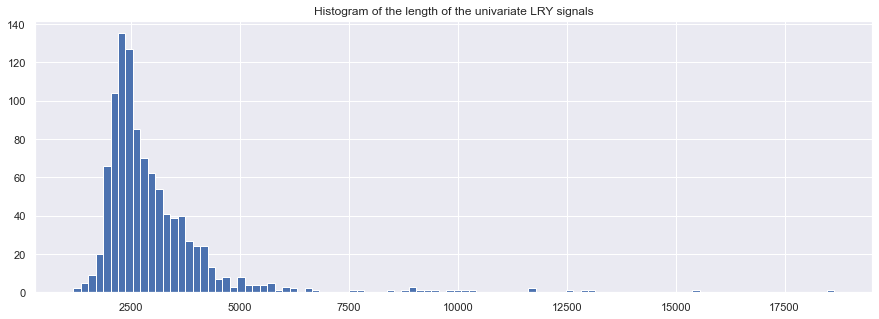

In [21]:
len_signal_list = []
for i in range(len(X_signal_feature)):
    len_signal_list.append(len(X_signal_feature[i]))

plt.hist(len_signal_list, bins=len(len_signal_list)//10)
plt.title(f'Histogram of the length of the univariate {signal_feature} signals')
plt.show()

_Observation_: The length of each chosen feature signal is different!

Let us plot a time series:

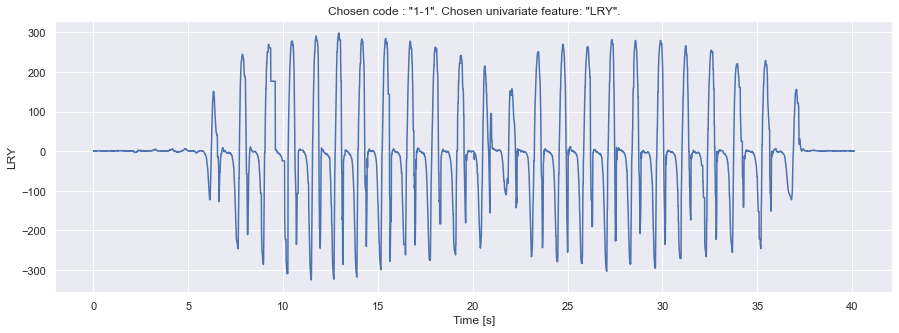

In [23]:
i = 0
tt = np.arange(len(X_signal_feature[i])) / 100
plt.plot(tt, X_signal_feature[i])
plt.title(f'Chosen code : "{code_list[i]}". Chosen univariate feature: "{signal_feature}".')
plt.xlabel(f'Time [s]')
plt.ylabel(f'{signal_feature}')
plt.show()

*Back to [top](#top).*

---
## <a name='conclusion'>5) Conclusion</a>

This example shows how to use `loadmydata` to handle the human locomotion data set. It contains 1,020 multivariate gait signals with 16 signal features (such as accelometries) and 14 metadata features (such as age).

*Back to [top](#top).*

---
## <a name='authors'>6) Authors</a>

This example notebook has been authored by [Sylvain W. Combettes](https://sylvaincom.github.io) and edited by [Charles Truong](https://charles.doffy.net).

---
_Back to [top](#top)._